<a href="https://colab.research.google.com/github/shubhkhandare/Detect-and-Track-objects-in-a-video-stream-OpenCV/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as plt
from sklearn import datasets, linear_model
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [ ]:
iris_data = pd.read_csv("iris.csv")

In [ ]:
print("\nLoaded Data : \n----------------------")
print(iris_data.head())


Loaded Data : 
----------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


USE a label encoder to convert string to numeric value

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

conver input to numpy array

In [ ]:
np_iris = iris_data.to_numpy()

seprate feature and target variable

In [ ]:
x_data = np_iris[:,0:4]
y_data = np_iris[:,4]

In [ ]:

print(x_data[:5,:])
print(y_data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0. 0. 0. 0. 0.]


scaler model that is fit on the ip data

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_data)
x_data = scaler.transform(x_data)

covert target variable as a one-hot-encoding arry

In [ ]:
y_data = tf.keras.utils.to_categorical(y_data,3)

In [ ]:
print(x_data[:5,:])
print(y_data[:5,:])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


**bold text**Spliting test data and train data

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size=0.10)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(135, 4) (135, 3) (15, 4) (15, 3)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output_Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Creating MODEl

In [ ]:
NB_CLASSES=3

**CREATING SEQUENTIAL MODEL**

In [ ]:
model = tf.keras.models.Sequential()

**LAYERS**

In [ ]:
model.add(keras.layers.Dense(128, input_shape=(4,), name='Hidden-Layer-1', activation='relu'))
model.add(keras.layers.Dense(128, input_shape=(4,), name='Hidden-Layer-2', activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES, input_shape=(4,), name='Output_Layer', activation='softmax'))



**COMPILE**

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output_Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**TRAINING AND ECALUTION**

In [ ]:
VERBOSE=1
BATCH_SIZE=16
EPOCHS=10
VALIDATON_SPLIT= 0.2

history =model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VALIDATION_SPLIT)




Epoch 1/10
7/7 [==============================] - 1s 37ms/step - loss: 0.1542 - accuracy: 0.9722 - val_loss: 0.2288 - val_accuracy: 0.8519
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.1324 - accuracy: 0.9352 - val_loss: 0.1921 - val_accuracy: 0.9259
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 0.1232 - accuracy: 0.9630 - val_loss: 0.1891 - val_accuracy: 0.9259
Epoch 4/10
7/7 [==============================] - 0s 8ms/step - loss: 0.1114 - accuracy: 0.9722 - val_loss: 0.1840 - val_accuracy: 0.9259
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 0.1035 - accuracy: 0.9722 - val_loss: 0.1861 - val_accuracy: 0.9259
Epoch 6/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0914 - accuracy: 0.9722 - val_loss: 0.1962 - val_accuracy: 0.9259
Epoch 7/10
7/7 [==============================] - 0s 7ms/step - loss: 0.0902 - accuracy: 0.9722 - val_loss: 0.1876 - val_accuracy: 0.9259
Epoch 8/10
7/7 [==============

In [ ]:
import matplotlib.pyplot as plt


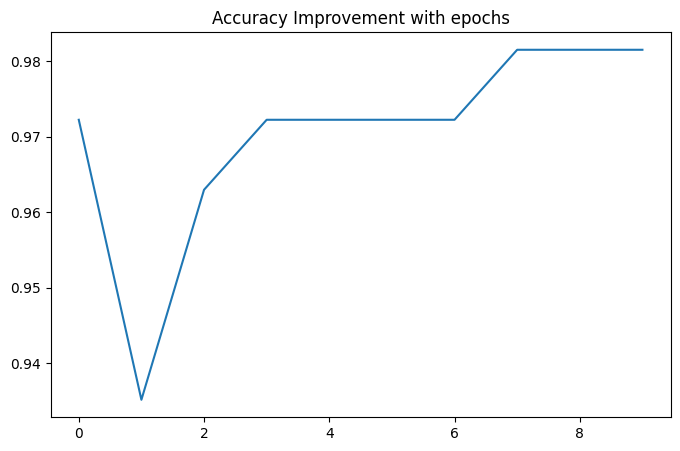

1/1 [==============================] - 0s 26ms/step - loss: 0.1311 - accuracy: 0.9333


[0.1310785561800003, 0.9333333373069763]

In [ ]:
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy Improvement with epochs")
plt.show()
model.evaluate(x_test, y_test)

** SAVING MODELS **

In [ ]:
model.save("iris_save")
loaded_model= keras.models.load_model("iris_save")
loaded_model.summary()

NameError: ignored